<a href="https://colab.research.google.com/github/jettecampbell/data-science/blob/main/JetteCampbell_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

It does, however not very well because the output in not very accurate and works better with data from another elpd_loo model. It uses other models to determine the difference between the two and discover potential weaknesses.

**Task2**:

Describe overfitting, in the context of this course

Over fitting in the context of this course is when the model has too much data, so it performs poorly with new samples due to it memorizing the patterns and initial data in its outputs rather than understanding the actual process.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by using less variables and simplier priors to predidct the process. Including irrelevant and strong priors causes the model to get thrown off instead of predicting the variables that are relevant.

**Task4**:

How do we mitigate underfitting?

We mitiage underfitting by picking a model with a good elpd_loo value. We can determine this value by using a elpd_loo model with another model to calculate the accuracy value.

**Task5**:

Why would we want more than one predictor in a model?

We would want more than one predictor in a model to improve the accuracy and factors for the model's output. Things are often influenced by multiple potential values, such as field goal % in basketball influenced by both player height and position.

**Task6**:

Can we have too many predictors? How would we now?

It is possible to have too many predictors, causing an overfitting model. We'd be able to know if this happened if our model's output matches the predictor data well, but doesn't align with how the actual process we are predicting should look. If we see correlation that doesn't make sense in the real world, it is likely part of our predictors are unnecessary.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of picking how many and which variables to use as predictors in a model. It works by finding the lowest number of variables we can use while still accuractly outputing good values. This minimizes overfitting while also maintining a model that is not underfit.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The first model would output the same slope for each of the categories, but they would have different intercepts. The second model would allow for slopes to be different for each category along with the intercepts. The third model would be similar to the second model and allow us to see how the non-categorical varaible interacts with the categories.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can't show the entire model in one graph because there are too many predictors and outputs. Instead, we can create a 2D graph by holding all but one predictor constant to see how that predictor relates to the outcome. We can also use tools like posterior predictive checks and elpd_loo charts, but these are more useful for comparing models than for visualizing.


**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [5]:
ft_pos_c = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [6]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


In [7]:
ft_pos_ft = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_pos_3pt = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [9]:
ft_pos_3pt_interact = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

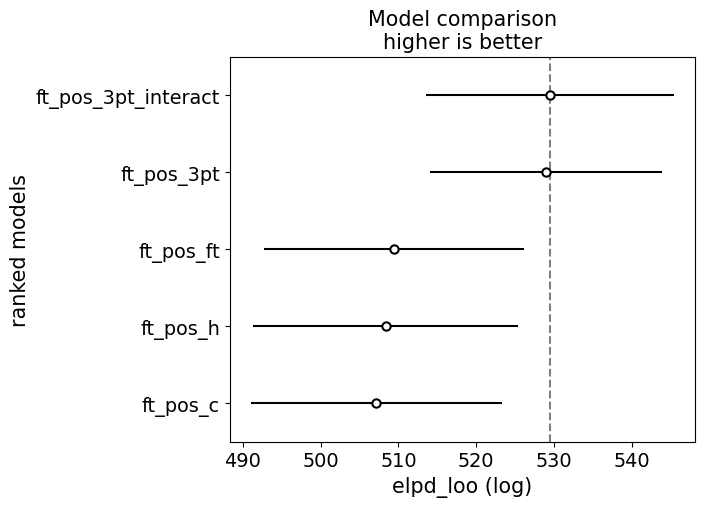

In [12]:
compare = az.compare({"ft_pos_c":ft_pos_c, "ft_pos_h":ft_pos_h, "ft_pos_ft":ft_pos_ft, "ft_pos_3pt":ft_pos_3pt, "ft_pos_3pt_interact":ft_pos_3pt_interact})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

Both the models including 3 point attempts are roughly equal and the most accurate, however the one that compares the 3 point attempts with position is better than the other one. This is likely because 3 point shots are a good predictor of how good a player is comapred to free throws and can account for many different factors. In addition, players with more attempts are more skilled because players that are less skilled likely just dont attempt the 3 pointers. The model that only compares 3 point attempts with position is likely scoring higher than the one that compares 3 point attempts with all 3 predictors because of overfitting. The model does not need all 3 predictors to accuratly predict the output, so these extra variables throw it off.